In [1]:
import numpy as np
import pandas as pd

prior = pd.read_csv('order_products__prior.csv')
print('Got prior products: {}'.format(prior.shape))
train = pd.read_csv('order_products__train.csv')
print('Got train products: {}'.format(train.shape))
all_orders = pd.concat([prior, train])
print('All together: {}'.format(all_orders.shape))

Got prior products: (32434489, 4)
Got train products: (1384617, 4)
All together: (33819106, 4)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
all_order_products = all_orders.loc[all_orders['reordered'] == 1, 'product_id']
products_dict = pd.read_csv('products.csv')
print('Top reordered products are...')
product_counts = all_order_products.value_counts().reset_index()
product_counts.columns = ['product_id','reordered']
product_counts['share'] = product_counts['reordered'] / product_counts['reordered'].sum()
product_counts = product_counts.merge(products_dict[['product_id','product_name']], how='left', on='product_id')
product_counts.head(30)

Top reordered products are...


,product_id,reordered,share,product_name
0,24852,415166,0.020805,Banana
1,13176,329275,0.016501,Bag of Organic Bananas
2,21137,214448,0.010746,Organic Strawberries
3,21903,194939,0.009769,Organic Baby Spinach
4,47209,176173,0.008828,Organic Hass Avocado
5,47766,140270,0.007029,Organic Avocado
6,27845,118684,0.005947,Organic Whole Milk
7,47626,112178,0.005621,Large Lemon
8,27966,109688,0.005497,Organic Raspberries
9,16797,104588,0.005241,Strawberries


In [5]:
orders = pd.read_csv('orders.csv')
print('Got orders: {}'.format(orders.shape))
user_order_products = all_orders.loc[all_orders['reordered'] == 1, ['product_id','order_id']]
user_order_products = user_order_products.merge(orders[['order_id','user_id']])
products_by_user = user_order_products.groupby(['user_id','product_id']).count().reset_index()
products_by_user.columns = ['user_id','product_id','reordered']
products_by_user = products_by_user.merge(products_dict[['product_id','product_name']], how='left', on='product_id')
print('Users with most products reordered')
products_reordered_sorted=products_by_user.sort_values('reordered', ascending=False)[['user_id','reordered','product_name']].head(50)

Got orders: (1048575, 10)
Users with most products reordered


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

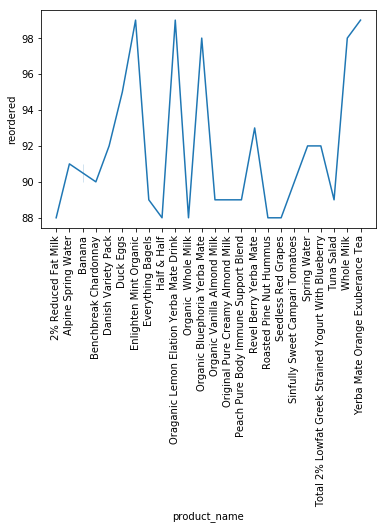

In [8]:
sns.lineplot(x=products_reordered_sorted.product_name.head(25),y=products_reordered_sorted.reordered)
plt.xticks(rotation="vertical")

In [9]:
products_reordered_sorted.head(10)

,user_id,reordered,product_name
1113675,41356,99,Enlighten Mint Organic
1113705,41356,99,Yerba Mate Orange Exuberance Tea
1113661,41356,99,Oraganic Lemon Elation Yerba Mate Drink
1113697,41356,98,Organic Bluephoria Yerba Mate
483810,17997,98,Whole Milk
978396,36335,95,Duck Eggs
1113669,41356,93,Revel Berry Yerba Mate
888689,32971,92,Danish Variety Pack
850119,31606,92,Total 2% Lowfat Greek Strained Yogurt With Blu...
1485844,54901,92,Spring Water
